<a href="https://colab.research.google.com/github/jorgecif/CovidMisinformationDetection/blob/main/ComparacionMetodosDeteccionDesinformacionCOVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detección de noticias falsas por medio de técnicas de aprendizaje automático y procesamiento de lenguaje natural** - Comparación de modelos de detección de noticias falsas (Naive Bayes, Logistic, RandomForest, SVM)


> Por: Jorge Orlando Cifuentes Cifuentes




### Librerías

In [2]:
# Generales
import warnings
warnings.filterwarnings('ignore')
#import csv
#import tensorflow as tf
import pandas as pd
import numpy as np
import joblib # Para exportar el modelo


# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocesamiento
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords


# Machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression # Logistic
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.svm import LinearSVC # Support Vector
from sklearn.naive_bayes import MultinomialNB # Naive Bayes
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split



#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from sklearn.naive_bayes import MultinomialNB # Naive Bayes
#from sklearn.ensemble import RandomForestClassifier # Random Forest
#from sklearn.svm import LinearSVC # Support Vector
#from sklearn.metrics import confusion_matrix, classification_report

# Machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Embedding, LSTM, SpatialDropout1D, Flatten, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.callbacks import EarlyStopping


import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model



# Parámetros
#STOPWORDS = set(stopwords.words('english'))
#vocab_size = 5000
##embedding_dim = 64
#max_length = 200
#trunc_type = 'post'
#padding_type = 'post'
#oov_tok = '<OOV>'


### Carga de datos

In [3]:
# Carga de datos
# Para efectos de prueba cargo las 1000 primeras líneas

#nrows= 1000 # número de registros a cargar

datos = pd.read_excel('/content/drive/My Drive/MaestriaAI2020/TFM/Datos/DatosTFM/News_Covid_v3.xlsx')



print("Se han cargado ", datos.shape[0], " noticias")


# Muestra de los datos
print(len(datos))
datos.head()


Se han cargado  21721  noticias
21721


,Text,country,lang,label,URL,date,verificado_por
0,Britain’s Death Toll from the Coronavirus Riva...,United Kingdom,English,True,https://www.snopes.com/ap/2020/05/05/britains-...,2020-02-02 00:00:00,snopes
1,Timeline Reset: CDC Confirms Weeks-Earlier Cal...,United States,English,True,https://www.snopes.com/ap/2020/04/22/timeline-...,2020-06-03 00:00:00,snopes
2,"Dentists, Hair Salons, Beaches: Lockdowns Ease...",United States,English,True,https://www.snopes.com/ap/2020/04/20/dentists-...,2020-08-03 00:00:00,snopes
3,33 Million Have Sought US Unemployment Aid Sin...,United States,English,True,https://www.snopes.com/ap/2020/05/07/33-millio...,2020-09-03 00:00:00,snopes
4,United States ‘Wasted’ Months Before Preparing...,United States,English,True,https://www.snopes.com/ap/2020/04/05/u-s-waste...,2020-03-04 00:00:00,snopes


In [4]:
# Verifico si hay valores nulos
datos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21721 entries, 0 to 21720
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            21721 non-null  object
 1   country         21721 non-null  object
 2   lang            21721 non-null  object
 3   label           21721 non-null  bool  
 4   URL             21623 non-null  object
 5   date            15183 non-null  object
 6   verificado_por  21721 non-null  object
dtypes: bool(1), object(6)
memory usage: 1.0+ MB


In [5]:
#Elimino duplicados de todas las columnas

datos2 = datos.drop_duplicates()
print(len(datos2))

# Elimino ambiguedades

datos3=datos2.drop_duplicates(['Text'], keep='first') # Elimino ambieguedades
print(len(datos3))

20966
18696


In [6]:
# Revuelvo los registros
datos3 = datos3.sample(frac = 1, random_state= 88) 
datos3=datos3.reset_index()
datos3=datos3.drop(["index"], axis=1)

# Muestra de los datos
datos3.head(10)
#print(len(datos))

,Text,country,lang,label,URL,date,verificado_por
0,A Chinese woman in Mombasa was attacked and ki...,Kenya,English,False,https://pesacheck.org/hoax-reports-that-a-chin...,2020-03-21 00:00:00,PesaCheck
1,This video shows fishes overflowing out of th...,India,Marathi,False,https://marathi.factcrescendo.com/old-video-fr...,2020/04/22,FactCrescendo
2,Initial data from clinical trials testing whet...,United States,English,True,https://reuters.com,NaN,Reuters
3,Authorities in Moscow said a QR-code system wo...,United States,English,True,https://reuters.com,NaN,Reuters
4,Studies show the coronavirus was engineered t...,United States,English,False,https://leadstories.com/hoax-alert/2020/03/Fac...,2020/02/19,LeadStories
5,As the architect of Sweden's unorthodox respon...,United States,English,True,https://reuters.com,NaN,Reuters
6,New York schools add a COVID-19 vaccine to th...,United States,English,False,https://leadstories.com/hoax-alert/2020/05/fac...,2020/04/19,LeadStories
7,Dr Anil Jasinghe is appointed as the Vice Chai...,Sri Lanka,Sinhala,False,https://srilanka.factcrescendo.com/2020/04/06/...,2020-04-06 00:00:00,FactCrescendo
8,Diagnostic services provider LabCorp said on T...,United States,English,True,https://reuters.com,NaN,Reuters
9,"Equity indices in the green, FMCG and IT stock...",India,English,True,https://www.afghanistannews.net/news/264217872...,2020-01-22 00:00:00,afghanistannews.net


In [7]:
# Desripción de los datos

datos3.describe(include="all")

,Text,country,lang,label,URL,date,verificado_por
count,18696,18696,18696,18696,18619,12894,18696
unique,18696,127,50,2,8226,315,130
top,Emmanuel Macron spent the first week-end of A...,United States,English,False,https://reuters.com,2020-04-03 00:00:00,Reuters
freq,1,7637,12468,11921,5651,680,5651


### Exploración inicial de los datos

In [8]:
# Reviso las 10 primeras categorías de cada variable categórica

for col in datos3.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(datos3[col].value_counts().head(10))

----------------------------------------Text---------------------------------------- - 

 Emmanuel Macron spent the first week-end of April in his residency of Bregançon in the South of France.                                                                                                                                                               1
U.S. coronavirus deaths topped 47,000 on Wednesday after rising by a near-record single-day number the previous day, according to a Reuters tally.                                                                                                                     1
Dr. Manish Patil died due to coronavirus in Maharasthra.                                                                                                                                                                                                               1
After weeks with almost no new coronavirus infections, Beijing has recorded dozens of new cases in recent days, all linked to a major wholesale food market, raising concerns about a resurgence of the disea

----------------------------------------country---------------------------------------- - 

United States    7637
India            2380
Spain             889
Brazil            714
France            500
Philippines       385
Colombia          340
Australia         302
Italy             298
China             289
Name: country, dtype: int64

----------------------------------------lang---------------------------------------- - 

English       12468
Spanish        1808
Portuguese      690
French          601
tl              505
Hindi           280
Italian         222
Arabic          136
Indonesian      115
Malayalam       114
Name: lang, dtype: int64

----------------------------------------label---------------------------------------- - 

False    11921
True      6775
Name: label, dtype: int64

----------------------------------------URL---------------------------------------- - 

https://reuters.com                                                                                                                              5651
http://www.ecuadorchequea.com/las-mentiras-sobre-el-covid-19-en-ecuador/                                                                           14
https://observers.france24.com/fr/20200130-intox-chine-soupe-chauve-souris-rumeur-origine-coronavirus                                               7
http://news.jtbc.joins.com/html/040/NB11932040.html                                                                                                 5
http://www.ecuadorchequea.com/las-mentiras-sobre-el-covid-19-en-ecuador/?fbclid=IwAR3bwAz0dMLw03No-V2hs3mNm5Nvl8V_p0AnNV7GbLCEh9do16WHgMrsBiE       4
https://factcheck.afp.com/graphic-purported-quote-philippine-vice-president-leni-robredo-has-been-doctored                                          4
https://piaui.folha.uol.com.br/lupa/2020/01/27/verificamos-coronavirus-infectou-28-milhoes-matou-112

----------------------------------------date---------------------------------------- - 

2020-04-03 00:00:00    680
2020-04-02 00:00:00    126
2020/03/17             126
2020-03-17 00:00:00    126
2020-03-23 00:00:00    125
2020-03-16 00:00:00    124
2020/03/23             117
2020-03-27 00:00:00    114
2020-03-24 00:00:00    113
2020/04/02             111
Name: date, dtype: int64

----------------------------------------verificado_por---------------------------------------- - 

Reuters                5651
AFP                     971
FactCrescendo           759
PolitiFact              543
Factly                  428
adelaidenow.au          413
BOOM FactCheck          404
LeadStories             399
Maldita.es              386
afghanistannews.net     355
Name: verificado_por, dtype: int64

In [9]:
# Filtro primeros 10 de cada variable 

verificado_10=datos3["verificado_por"].value_counts().head(10)
lang_10=datos3["lang"].value_counts().head(10)
country_10=datos3["country"].value_counts().head(10)

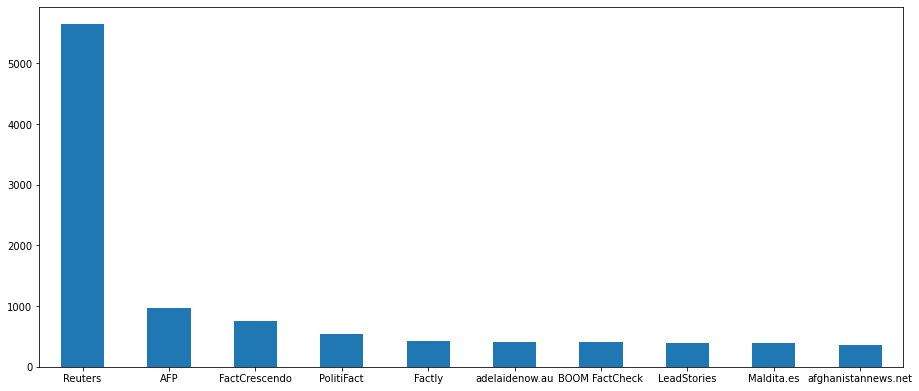

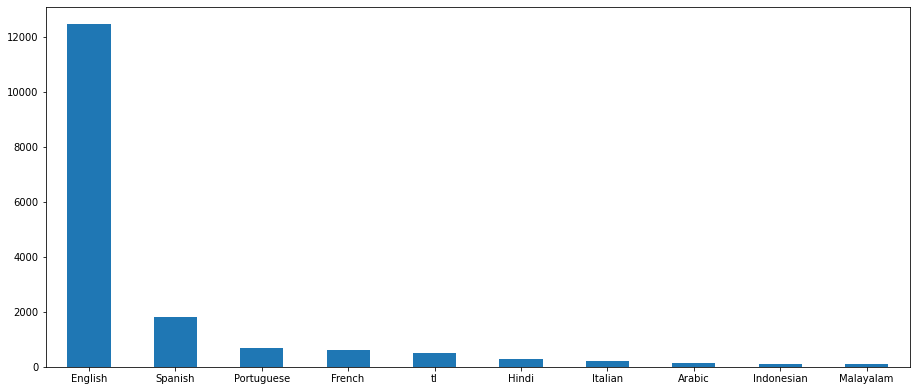

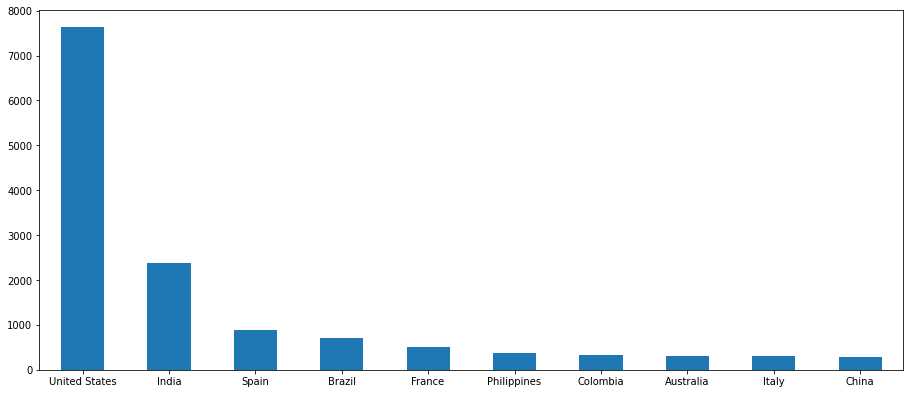

In [10]:
# Grafico datos

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax = verificado_10.plot.bar(x='lab', y='val', rot=0)

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax = lang_10.plot.bar(x='lab', y='val', rot=0)

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax = country_10.plot.bar(x='lab', y='val', rot=0)

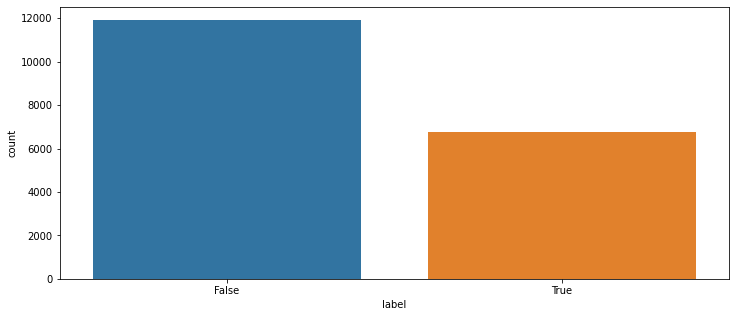

In [11]:
# Distribución de las categorías datos de trabajo
plt.figure(figsize=(12,5))
sns.countplot("label", data=datos3)
plt.show()

In [12]:
# Filtro datos sólo en inglés
datos_ingles=datos3[datos3['lang']=="English"]
len(datos_ingles)

12468

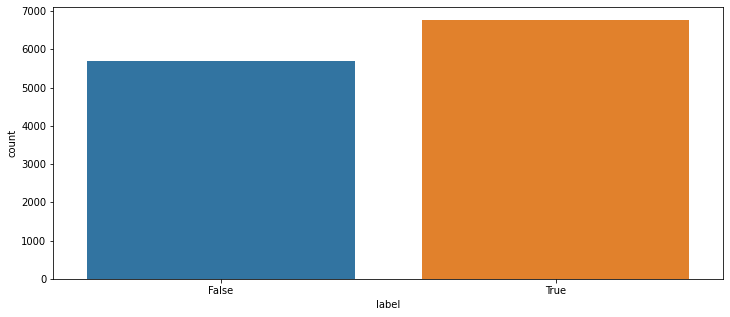

In [13]:
# Distribución de las categorías datos de trabajo filtrados en idioma inglés
plt.figure(figsize=(12,5))
sns.countplot("label", data=datos_ingles)
plt.show()

### Creación de conjuntos de datos

In [14]:
# Reservo unos datos para pruebas finales (datos que no se tocan)

datos_trabajo,datos_reserva = train_test_split(datos_ingles, test_size=0.1, random_state=88 )
datos_trabajo=datos_trabajo.reset_index()
datos_trabajo=datos_trabajo.drop(["index"], axis=1)

datos_reserva=datos_reserva.reset_index()
datos_reserva=datos_reserva.drop(["index"], axis=1)

print("Datos para trabajar: ", len(datos_trabajo))
print("Datos reservados para pruebas finales ", len(datos_reserva))



Datos para trabajar:  11221
Datos reservados para pruebas finales  1247


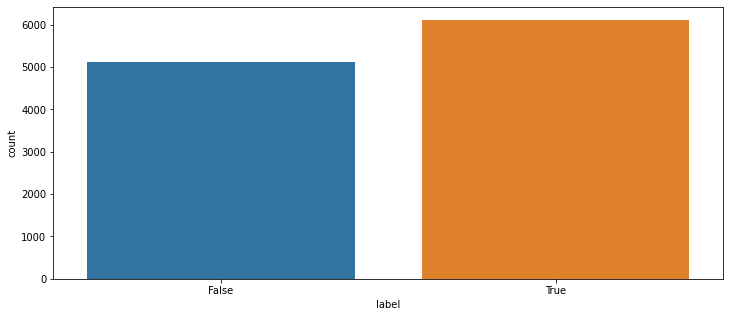

In [15]:
# Distribución de las categorías datos de trabajo
plt.figure(figsize=(12,5))
sns.countplot("label", data=datos_trabajo)
plt.show()

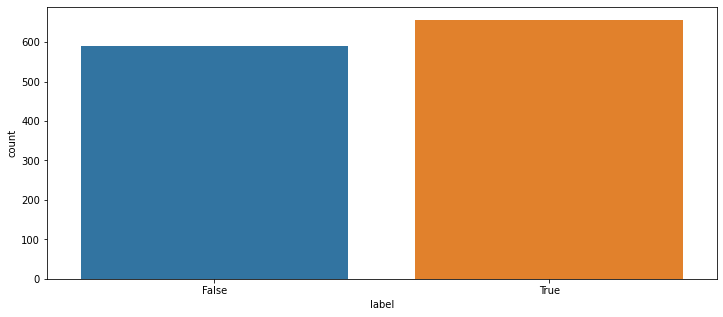

In [16]:
# Distribución de las categorías datos reservados
plt.figure(figsize=(12,5))
sns.countplot("label", data=datos_reserva)
plt.show()

In [19]:
datos_trabajo.head(10)

,Text,country,lang,label,URL,date,verificado_por
0,"Britain is not ""anywhere close"" to the scenari...",United States,English,True,https://reuters.com,NaN,Reuters
1,A video of Chinese people fighting for Muslim...,Indonesia,English,False,https://s.id/fhqAe,2020/03/12,TEMPO
2,The reproductive number of COVID-19 in England...,United States,English,True,https://reuters.com,NaN,Reuters
3,Peru's miners are revving up stalled operation...,United States,English,True,https://reuters.com,NaN,Reuters
4,More than 150 patients were evacuated on Satur...,United States,English,True,https://reuters.com,NaN,Reuters
5,Thai department of health published an infogr...,Thailand,English,False,http://u.afp.com/ThaiFaceMasks,2020/02/07,AFP
6,A picture claims that an Italian man committe...,India,English,False,https://www.boomlive.in/fake-news/dated-photos...,2020/03/26,BOOM FactCheck
7,Viral picture message in Nigeria suggests form...,Nigeria,English,False,https://dubawa.org/and-another-one-what-did-ob...,2020-03-02 00:00:00,Dubawa
8,Publication broadcasts a video of “the market ...,North Macedonia,English,False,https://truthmeter.mk/the-market-of-terror-is-...,2020-01-30 00:00:00,Vistinomer
9,Diagnostic services provider LabCorp said on T...,United States,English,True,https://reuters.com,NaN,Reuters


###  Preparación de los datos

In [20]:
# Convierto categorías en números - datos de trabajo

category_dict = {value:index for index, value in enumerate(datos_trabajo["label"].unique())} # Extraigo categorías de todos los datos


# Extraigo datos de titulares
corpus_trabajo = datos_trabajo["Text"]
results_trabajo = datos_trabajo["label"].map(category_dict)
#category_dict_trabajo
datos_trabajo["label"]

0         True
1        False
2         True
3         True
4         True
         ...  
11216    False
11217    False
11218    False
11219     True
11220     True
Name: label, Length: 11221, dtype: bool

In [21]:
category_dict

{False: 1, True: 0}

In [ ]:
corpus_trabajo

0        Britain is not "anywhere close" to the scenari...
1         A video of Chinese people fighting for Muslim...
2        The reproductive number of COVID-19 in England...
3        Peru's miners are revving up stalled operation...
4        More than 150 patients were evacuated on Satur...
                               ...                        
11216    A Twitter post claimed Cristiano Ronaldo is tr...
11217     News graphic saying Indian prime minister has...
11218     The WHO declared COVID-19 is the abbreviation...
11219    The toilet paper panic has officially spread.W...
11220    The U.S. government on Wednesday said it will ...
Name: Text, Length: 11221, dtype: object

In [22]:
# Convierto categorías en números - datos de trabajo

# Extraigo datos de titulares
corpus_trabajo = datos_trabajo["Text"]
results_trabajo = datos_trabajo["label"].map(category_dict)
#category_dict_trabajo
datos_trabajo["label"]

0         True
1        False
2         True
3         True
4         True
         ...  
11216    False
11217    False
11218    False
11219     True
11220     True
Name: label, Length: 11221, dtype: bool

In [23]:
results_trabajo

0        0
1        1
2        0
3        0
4        0
        ..
11216    1
11217    1
11218    1
11219    0
11220    0
Name: label, Length: 11221, dtype: int64

In [24]:
# Convierto categorías en números - datos de reserva

# Extraigo datos de titulares
corpus_reserva = datos_reserva["Text"]

# Construyo mapa de categorías
results_reserva = datos_reserva["label"].map(category_dict) # Mapeo categorías con el mismo diccionario (category_dict)

In [25]:
datos_reserva["label"]

0       False
1        True
2       False
3       False
4       False
        ...  
1242     True
1243     True
1244    False
1245     True
1246     True
Name: label, Length: 1247, dtype: bool

In [ ]:
results_reserva

0       1
1       0
2       1
3       1
4       1
       ..
1242    0
1243    0
1244    1
1245    0
1246    0
Name: label, Length: 1247, dtype: int64

In [26]:
# Parámetros
n_most_common_words = 8000
max_len = 130


# Creo tokenizador con todos los datos
corpus = datos3["Text"]
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(corpus.values)
word_index = tokenizer.word_index
print('Se encontraron %s tokens únicos' % len(word_index))

Se encontraron 28811 tokens únicos


In [27]:
# Tokenización datos de trabajo

corpus_trabajo = datos_trabajo["Text"]
sequences = tokenizer.texts_to_sequences(corpus_trabajo.values)
X = pad_sequences(sequences, maxlen=max_len)

In [28]:
# Tokenización datos de reserva para pruebas

corpus_reserva = datos_reserva["Text"]
sequences_reserva = tokenizer.texts_to_sequences(corpus_reserva.values)
X_reserva = pad_sequences(sequences_reserva, maxlen=max_len)

In [ ]:
X_reserva[120]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  562, 1228,   95,   35,
         24,   21,  157,    4,    1,  156,  131,    4,  312,  102,    1,
          7,   61,   51,   80,   22,  700,  388,    8, 6242,   16,   23,
        351,   63, 4467,  119,    2,   15,   14,    5,   46,  582,  584,
          8,   85,  243,  892,   11,   15,   83,  383,   47], dtype=int32)

### Train - Test split

In [29]:
# Train - Test Split

x_train,x_test, y_train,y_test = train_test_split(X, results_trabajo, test_size=0.2, random_state=88 )

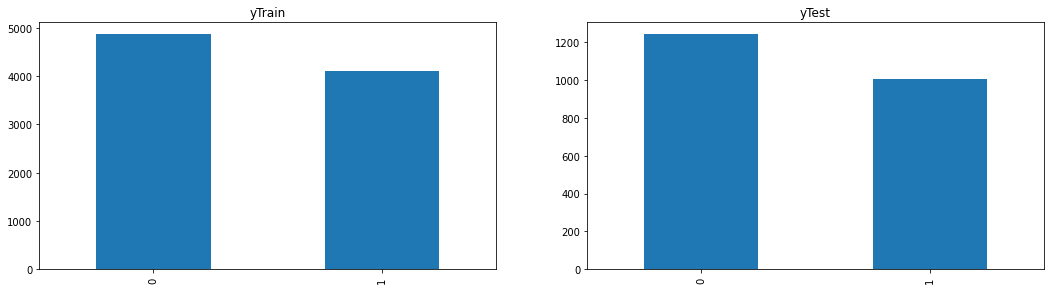

In [30]:
# Visualizo el balance de las clases luego de la división para verificar que no exista un desbalance
df_y_train = pd.DataFrame({'yTrain': y_train})

df_y_test = pd.DataFrame({'yTest': y_test})


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 10))
plt.subplot(2, 2, 1).set_title('yTrain')
df_y_train["yTrain"].value_counts().plot(kind='bar')

plt.subplot(2, 2, 2).set_title('yTest')
df_y_test["yTest"].value_counts().plot(kind='bar')

### Comparación de los modelos


In [31]:
# Comparación de modelos
# Listado de modelos
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    ]

In [32]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

### Comparación de modelos

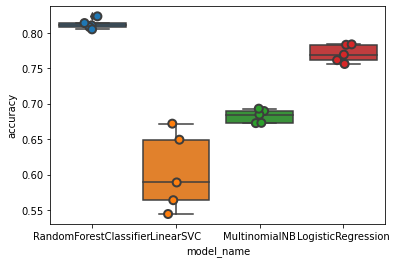

In [33]:
# Gráfico comparativo de la precisión estimada de los modelos
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

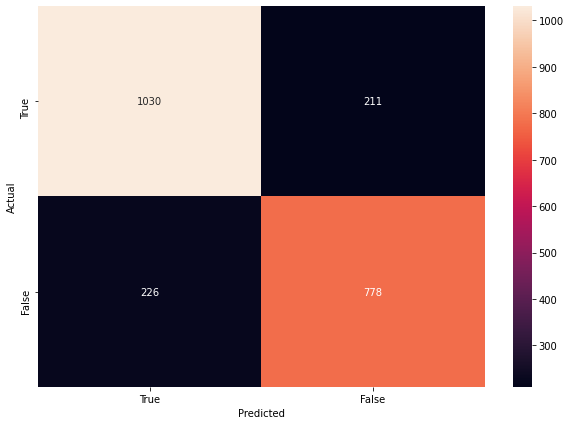

In [34]:
# Modelo RandomForest
from sklearn.metrics import confusion_matrix

modelRF = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
modelRF.fit(x_train, y_train)
y_pred = modelRF.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

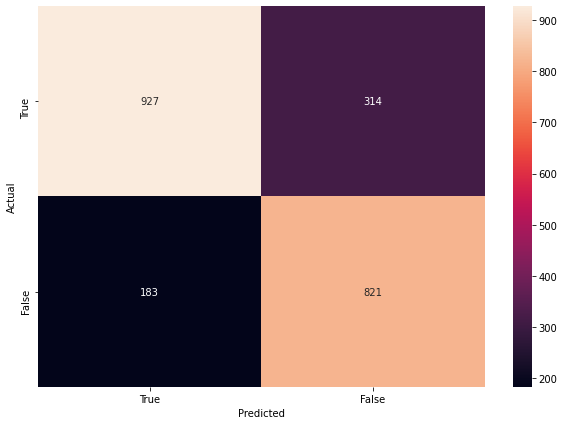

In [35]:
# Modelo Logistic
from sklearn.metrics import confusion_matrix

modelLOG = LogisticRegression(random_state=0)
modelLOG.fit(x_train, y_train)
y_pred = modelLOG.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

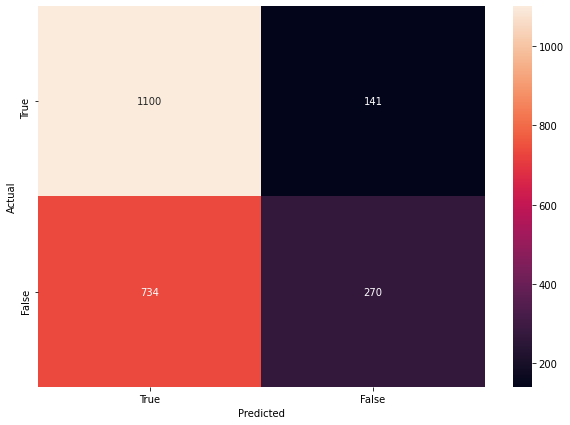

In [36]:
# Modelo Vector Soporte Lineal
from sklearn.metrics import confusion_matrix

modelSVC = LinearSVC()
modelSVC.fit(x_train, y_train)
y_pred = modelSVC.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

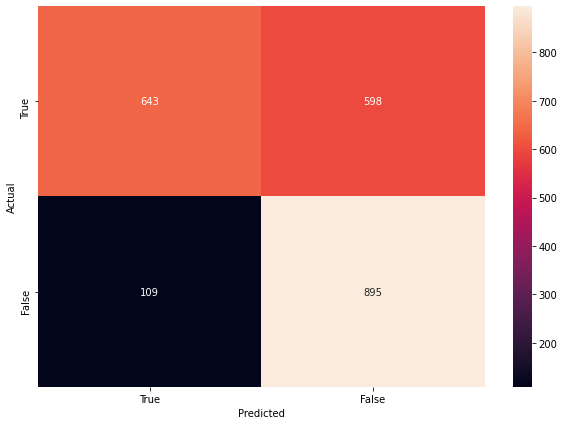

In [37]:
# Modelo Multinomial Naive Bayes
from sklearn.metrics import confusion_matrix

modelNB = MultinomialNB()
modelNB.fit(x_train, y_train)
y_pred = modelNB.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Prueba del modelo

In [38]:
datos_reserva[datos_reserva["label"]==True].head(29)

,Text,country,lang,label,URL,date,verificado_por
1,The reproduction rate for the coronavirus in G...,United States,English,True,https://reuters.com,NaN,Reuters
5,The U.S. Centers for Disease Control and Preve...,United States,English,True,https://reuters.com,NaN,Reuters
6,Brazil's health regulator Anvisa on Tuesday au...,United States,English,True,https://reuters.com,NaN,Reuters
13,Southwest Airlines said on Wednesday it was e...,United States,English,True,https://reuters.com,NaN,Reuters
16,The United Kingdom's chief medical officers ha...,United States,English,True,https://reuters.com,NaN,Reuters
19,"One January lunchtime in a car parts company, ...",United States,English,True,https://reuters.com,NaN,Reuters
20,China Virus Toll Rises to Nine As Pandemic Fea...,China,English,True,https://www.afghanistannews.net/news/263789036...,2020-03-02 00:00:00,afghanistannews.net
23,French healthcare workers protested against ex...,United States,English,True,https://reuters.com,NaN,Reuters
24,Several large drugmakers including Merck & Co ...,United States,English,True,https://reuters.com,NaN,Reuters
26,"Singapore's Tychan, a biotechnology firm backe...",United States,English,True,https://reuters.com,NaN,Reuters


In [39]:
datos_reserva.head(29)

,Text,country,lang,label,URL,date,verificado_por
0,Existence of a vaccination summit may be a si...,Georgia,English,False,http://mythdetector.ge/en/myth/are-vaccines-te...,2020/06/11,Myth Detector
1,The reproduction rate for the coronavirus in G...,United States,English,True,https://reuters.com,NaN,Reuters
2,"3,500 Italians potentially infected with the n...",Brazil,English,False,https://aosfatos.org/noticias/e-falso-que-3500...,2020-02-29 00:00:00,Aos Fatos
3,The Indian Army has been called to control sev...,India,English,False,https://www.boomlive.in/fake-news/false-army-c...,2020-04-03 00:00:00,BOOM FactCheck
4,Says Queen Elizabeth said Philippine President...,United States,English,False,https://www.politifact.com/factchecks/2020/apr...,2020-04-06 00:00:00,PolitiFact
5,The U.S. Centers for Disease Control and Preve...,United States,English,True,https://reuters.com,NaN,Reuters
6,Brazil's health regulator Anvisa on Tuesday au...,United States,English,True,https://reuters.com,NaN,Reuters
7,Ugandan President Kaguta Museveni and Prime M...,Uganda,English,False,https://pesacheck.org/false-ugandan-president-...,2020/06/09,PesaCheck
8,A video has been viewed thousands of times on...,Malaysia,English,False,https://factcheck.afp.com/video-shows-safety-d...,2020/04/09,AFP
9,“Bill Gates Explains That The COVID Vaccine W...,United States,English,False,https://www.politifact.com/factchecks/2020/may...,2020/05/20,PolitiFact


In [44]:
# Prueba con textos de datos de reserva

text1=datos_reserva["Text"][15]
text2=datos_reserva["Text"][25]
text3=datos_reserva["Text"][57]

print("Texto 1: ", text1)
print("Categoria real: ",datos_trabajo["label"][15])

print("Texto 2: ", text2)
print("Categoria real: ",datos_reserva["label"][25])

print("Texto 3: ", text3)
print("Categoria real: ",datos_reserva["label"][57])

Texto 1:   Having a beard increases your chances of getting coronavirus.
Categoria real:  False
Texto 2:   China “stole coronavirus from Canada and weaponized it into a Bioweapon.”
Categoria real:  False
Texto 3:  India reported a record daily increase of novel coronavirus cases on Friday and became the world's fourth worst-hit country, raising the prospect of the return of a lockdown just days after it was lifted.
Categoria real:  True


In [45]:
datos_reserva.head(6)

,Text,country,lang,label,URL,date,verificado_por
0,Existence of a vaccination summit may be a si...,Georgia,English,False,http://mythdetector.ge/en/myth/are-vaccines-te...,2020/06/11,Myth Detector
1,The reproduction rate for the coronavirus in G...,United States,English,True,https://reuters.com,NaN,Reuters
2,"3,500 Italians potentially infected with the n...",Brazil,English,False,https://aosfatos.org/noticias/e-falso-que-3500...,2020-02-29 00:00:00,Aos Fatos
3,The Indian Army has been called to control sev...,India,English,False,https://www.boomlive.in/fake-news/false-army-c...,2020-04-03 00:00:00,BOOM FactCheck
4,Says Queen Elizabeth said Philippine President...,United States,English,False,https://www.politifact.com/factchecks/2020/apr...,2020-04-06 00:00:00,PolitiFact
5,The U.S. Centers for Disease Control and Preve...,United States,English,True,https://reuters.com,NaN,Reuters


In [46]:
# Función para prueba

def news_alert(a, modelo_probar):
    clf=modelo_probar
    # Tokenizacion
    corpus_1=[]
    corpus_1.append(a)
    corpus_2=pd.Series(corpus_1)
    sequences_reserva = tokenizer.texts_to_sequences(corpus_2.values)
    transform_vect_reserva= pad_sequences(sequences_reserva, maxlen=max_len)
    #print(transform_vect_reserva)
    
    prediccion=clf.predict(transform_vect_reserva)
    prediccion_a = [np.array(prediccion)]
    print(prediccion)    

    if prediccion == 1:
       print("Alerta")
    else:
      print("No alerta")

In [47]:
clasificar_texto=text2
print(clasificar_texto)

print("Modelo RF")
print(news_alert(clasificar_texto, modelRF))

 China “stole coronavirus from Canada and weaponized it into a Bioweapon.”
Modelo RF
[1]
Alerta
None


In [48]:
# Prueba con función

# 1 alerta
# 0 no alerta

clasificar_texto=text1
print(clasificar_texto)

print("Modelo RF")
print(news_alert(clasificar_texto, modelRF))

print(" ")
print("Modelo LOG")
print(news_alert(clasificar_texto, modelLOG))

print(" ")
print("Modelo SVC")
print(news_alert(clasificar_texto, modelSVC))

print(" ")
print("Modelo NB")
print(news_alert(clasificar_texto, modelNB))


 Having a beard increases your chances of getting coronavirus.
Modelo RF
[1]
Alerta
None
 
Modelo LOG
[1]
Alerta
None
 
Modelo SVC
[0]
No alerta
None
 
Modelo NB
[1]
Alerta
None


In [49]:
news_alert(clasificar_texto, modelLOG)

[1]
Alerta


In [ ]:
# voy aquí

### Generación de archivo del modelo

In [ ]:
# voy aquí

# Voy aqui

In [ ]:
# Convierto categorías en números - datos de trabajo

category_dict = {value:index for index, value in enumerate(datos_trabajo["label"].unique())} # Extraigo categorías de todos los datos


# Extraigo datos de titulares
corpus_trabajo = datos_trabajo["Text"]
results_trabajo = datos_trabajo["label"].map(category_dict)
#category_dict_trabajo
datos_trabajo["label"]

0       False
1       False
2       False
3       False
4       False
        ...  
6171    False
6172    False
6173    False
6174    False
6175    False
Name: label, Length: 6176, dtype: bool

### Preparación de los datos

In [ ]:
corpus_trabajo

0       The accompanying footage shows a black man pus...
1       Below is a screenshot of the misleading Facebo...
2       Neither CNN nor coffee. Dr. Li Wenliang became...
3       It starts off with a purported warning from po...
4       సోర్సెస్:క్లెయిమ్: ఫేస్బుక్ పోస్ట్ (ఆర్కైవ్డ్)...
                              ...                        
6171    The MMS is also known as "miracle mineral supp...
6172    , Brandon Brown, a professor at University of ...
6173    A video of a man purportedly whipping people o...
6174    A post shared on social media by a user named ...
6175    A blog post headlined that the President of th...
Name: Text, Length: 6176, dtype: object

In [ ]:
# Convierto categorías en números - datos de trabajo

# Extraigo datos de titulares
corpus_trabajo = datos_trabajo["Title "]
results_trabajo = datos_trabajo["label"].map(category_dict)
#category_dict_trabajo
datos_trabajo["label"]

0       False
1       False
2       False
3       False
4       False
        ...  
6171    False
6172    False
6173    False
6174    False
6175    False
Name: label, Length: 6176, dtype: bool

In [ ]:
results_trabajo

0       0
1       0
2       0
3       0
4       0
       ..
6171    0
6172    0
6173    0
6174    0
6175    0
Name: label, Length: 6176, dtype: int64

In [ ]:
# Convierto categorías en números - datos de reserva

# Extraigo datos de titulares
corpus_reserva = datos_reserva["Title "]

# Construyo mapa de categorías
results_reserva = datos_reserva["label"].map(category_dict) # Mapeo categorías con el mismo diccionario (category_dict)

In [ ]:
datos_reserva["label"]

0      False
1      False
2      False
3       True
4      False
       ...  
682    False
683    False
684    False
685     True
686    False
Name: label, Length: 687, dtype: bool

In [ ]:
results_reserva

0      0
1      0
2      0
3      1
4      0
      ..
682    0
683    0
684    0
685    1
686    0
Name: label, Length: 687, dtype: int64

In [ ]:
# Parámetros
n_most_common_words = 8000
max_len = 130


# Creo tokenizador con todos los datos
corpus = datos3["Text"]
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(corpus.values)
word_index = tokenizer.word_index
print('Se encontraron %s tokens únicos' % len(word_index))

Se encontraron 307554 tokens únicos


In [ ]:
# Tokenización datos de trabajo

corpus_trabajo = datos_trabajo["Text"]
sequences = tokenizer.texts_to_sequences(corpus_trabajo.values)
X = pad_sequences(sequences, maxlen=max_len)


In [ ]:
# Tokenización datos de reserva para pruebas

corpus_reserva = datos_reserva["Text"]
sequences_reserva = tokenizer.texts_to_sequences(corpus_reserva.values)
X_reserva = pad_sequences(sequences_reserva, maxlen=max_len)

In [ ]:
X_reserva[120]

array([2924,   13, 1521, 2070, 2355,    4, 3950,  888, 3223, 4140,  120,
        641,  160,   22, 1781, 2828,  888,    7,  701,    5,  449, 3778,
        359,   63,  292,    1, 2414,    4,   85, 3431,    5,  661,  162,
         77,   76,    1, 1166, 1353,  359,  589,   28,   69,   11,  262,
          4,   52, 1672, 1437,    4,  359,   55,  929, 2608,  224, 1541,
         22,  984,  360,   14,   46,    7,   99,   90,   85,  927,   24,
       4115,   25,   46,    7,  282,   90,   85,  927,  670,  607,   55,
        188, 1566,  293,  359,   37, 2545,    5, 2588,   55,   32, 1311,
         65,   61,   28,   24, 1747,    1,  120, 2611, 3731,    7, 1179,
          5,  251,  107,  401,    6,  143,   90,   85, 3457,   43,    1,
        245,    4, 4533,   28,  174, 4923,    1, 5819, 1598,  448, 1951,
         35,  764,    5, 3616,    5,    3, 3353,   17,  593], dtype=int32)

In [ ]:
datos_reserva["Text"][120]

'An article claiming that President Yoweri Museveni has shut down State House and reduced the size of cabinet to 23 ministers due to COVID-19 is FALSE.President Museveni, who has been constantly updating the nation about the efforts being taken by the government to curb the spread of COVID-19 in the country, has not made any announcement about shutting down State House or downsizing his cabinet. No credible media publication has covered these claims, which would have been hard to miss considering how newsworthy they are.Have you spotted what you think is fake news or false information on Facebook? Here’s how you can report. And, here’s more information on PesaCheck’s methodology for fact-checking questionable content.PesaCheck is a joint initiative of Code for Africa, through its innovateAFRICA fund, with additional funding support from the International Budget Partnership (Kenya) and Twaweza, in partnership with a coalition of local media organisations, and the International Center fo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
 datos_trabajo["Title "]

0       Turkish Ministry of Health issued a document t...
1        A photo of a room lined with coffins shows It...
2                         Coronavirus found in crab legs.
3        Japanese Nobel laureate professor Tasuku Honj...
4        Scientists in the United States have discover...
                              ...                        
5552     Man critical with novel coronavirus in Barhal...
5553    A leading public health expert who spearheaded...
5554       Lysol products can kill the novel coronavirus.
5555     Regarding the risks of coronavirus transmissi...
5556    A photograph of a woman hugging her young chil...
Name: Title , Length: 5557, dtype: object

### Train - Test split

In [ ]:
# Train - Test Split

x_train,x_test, y_train,y_test = train_test_split(X, results, test_size=0.2, random_state=88 )

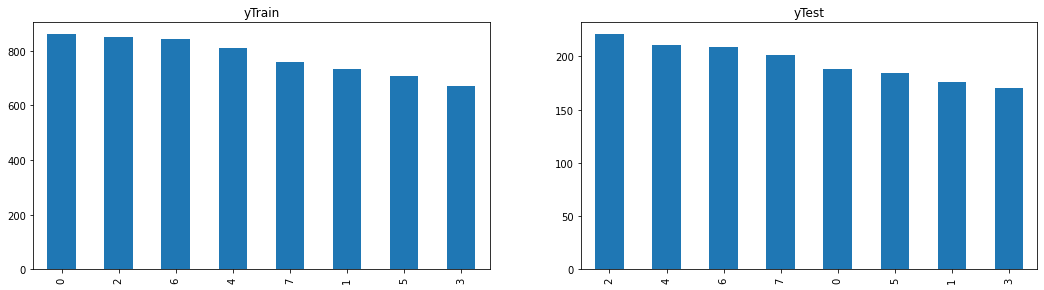

In [ ]:
# Visualizo el balance de las clases luego de la división para verificar que no exista un desbalance
df_y_train = pd.DataFrame({'yTrain': y_train})

df_y_test = pd.DataFrame({'yTest': y_test})


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 10))
plt.subplot(2, 2, 1).set_title('yTrain')
df_y_train["yTrain"].value_counts().plot(kind='bar')

plt.subplot(2, 2, 2).set_title('yTest')
df_y_test["yTest"].value_counts().plot(kind='bar')

### Comparación de los modelos

> Bloque con sangría



In [ ]:
# Comparación de modelos
# Listado de modelos
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    ]

In [ ]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

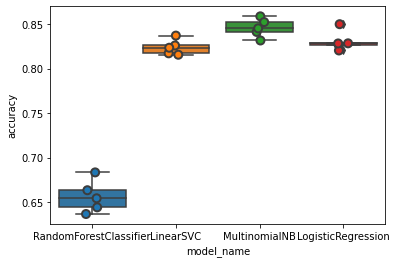

In [ ]:
# Gráfico comparativo de la precisión estimada de los modelos
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

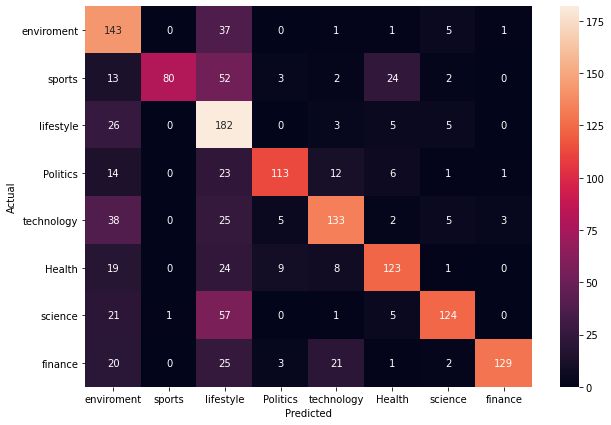

In [ ]:
# Modelo RandomForest
from sklearn.metrics import confusion_matrix

modelRF = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
modelRF.fit(x_train, y_train)
y_pred = modelRF.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

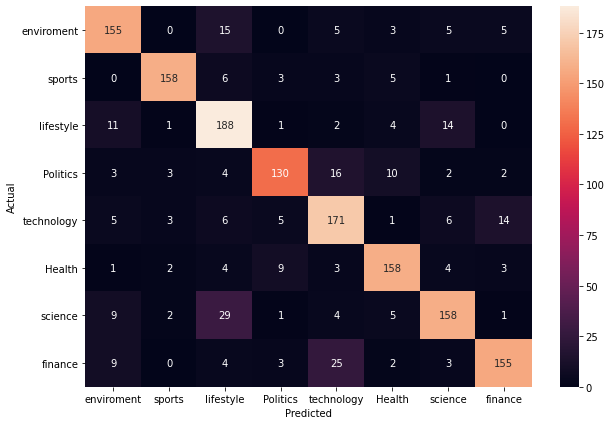

In [ ]:
# Modelo Logistic
from sklearn.metrics import confusion_matrix

modelLOG = LogisticRegression(random_state=0)
modelLOG.fit(x_train, y_train)
y_pred = modelLOG.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

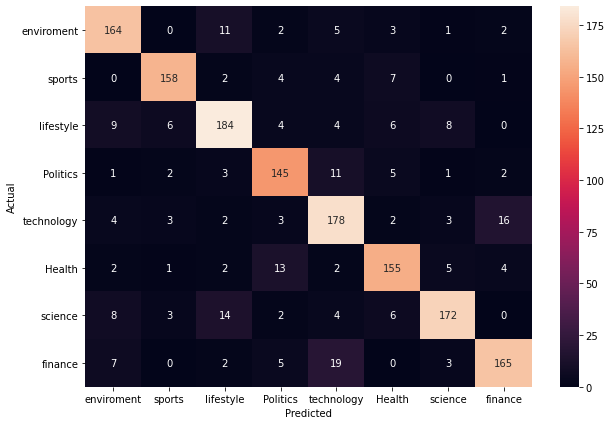

In [ ]:
# Modelo Multinomial Naive Bayes
from sklearn.metrics import confusion_matrix

modelNB = MultinomialNB()
modelNB.fit(x_train, y_train)
y_pred = modelNB.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

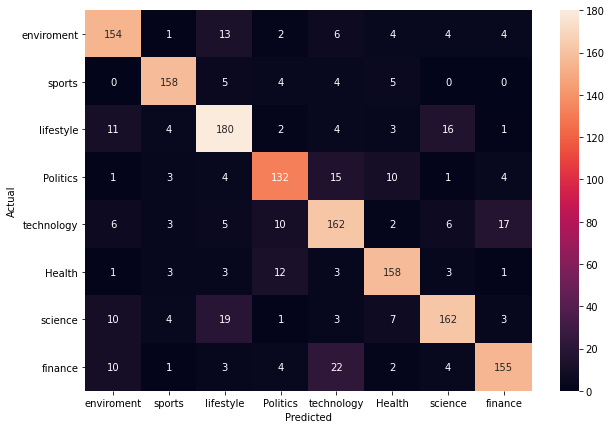

In [ ]:
# Modelo Vector Soporte Lineal
from sklearn.metrics import confusion_matrix

modelSVC = LinearSVC()
modelSVC.fit(x_train, y_train)
y_pred = modelSVC.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Prueba del modelo

In [ ]:
# Función para probar modelos y predecir la categoría de la noticia
# De acuerdo con:

# {'Health': 5,
# 'Politics': 3,
# 'enviroment': 0,
# 'finance': 7,
# 'lifestyle': 2,
# 'science': 6,
# 'sports': 1,
# 'technology': 4}


def newscategorifier(a, modelo_probar):
    clf=modelo_probar
    test_name1 = [a]
    transform_vect =vectorizer.transform(test_name1).toarray()
    #print(clf.predict(transform_vect))
    if clf.predict(transform_vect) == 0:
        print("enviroment")
    elif clf.predict(transform_vect) == 1:
        print("sports")
    elif clf.predict(transform_vect) == 2:
        print("lifestyle")
    elif clf.predict(transform_vect) == 3:
        print("Politics")
    elif clf.predict(transform_vect) == 4:
        print("technology")    
    elif clf.predict(transform_vect) == 5:
        print("Health")
    elif clf.predict(transform_vect) == 6:
        print("science") 
    else:
        print("finance")

In [ ]:
# Prueba con textos de datos de reserva

text1=datos_reserva["headline"][0]
text2=datos_reserva["headline"][55]
text3=datos_reserva["headline"][88]

print("Texto 1: ", text1)
print("Categoria real: ",datos_reserva["label"][0])

print("Texto 2: ", text2)
print("Categoria real: ",datos_reserva["label"][55])

print("Texto 3: ", text3)
print("Categoria real: ",datos_reserva["label"][88])



Texto 1:  Here is a selection of quotes from world leaders and ordinary people about the global COVID-19 pandemic, which has now killed more than 1 million people.
Categoria real:  Health
Texto 2:  Israeli satellite operator Space Communications said on Wednesday it would launch a new telecommunications satellite in 2019 after losing a prior one in an explosion.
Categoria real:  science
Texto 3:  Trade negotiators from the United States and China will discuss the implementation of the phase one trade deal in the coming days, with China likely to bring up issues surrounding TikTok and WeChat, Bloomberg News reported on Wednesday, citing sources.
Categoria real:  technology


In [ ]:
# Prueba con los modelos

clasificar_texto=text3

print("Modelo SVC")
print(newscategorifier(clasificar_texto, modelSVC))

print(" ")
print("Modelo NB")
print(newscategorifier(clasificar_texto, modelNB))

print(" ")
print("Modelo LOG")
print(newscategorifier(clasificar_texto, modelLOG))

print(" ")
print("Modelo RF")
print(newscategorifier(clasificar_texto, modelRF))

Modelo SVC
technology
None
 
Modelo NB
technology
None
 
Modelo LOG
technology
None
 
Modelo RF
technology
None


### Generación de archivo del modelo

In [ ]:
## Guardo los modelos en archivos


filename = 'SVC_model.pkl'
joblib.dump(modelSVC, filename)

filename = 'NB_model.pkl'
joblib.dump(modelNB, filename)

filename = 'LOG_model.pkl'
joblib.dump(modelLOG, filename)

filename = 'RF_model.pkl'
joblib.dump(modelRF, filename)

filename = 'vectorizer.pkl'
joblib.dump(vectorizer, filename)


['vectorizer.pkl']